In [1]:
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import os

import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [33]:
DIR = "H:\\Middle_Resolution\\19070522\\S004\\L1\\E01\\"

# mtcnn = MTCNN()

img_dir = os.listdir(DIR)
img_list = []

for img in img_dir:
    img_list.append(img)

print(img_list)

['C1.jpg', 'C10.jpg', 'C11.jpg', 'C12.jpg', 'C13.jpg', 'C14.jpg', 'C15.jpg', 'C16.jpg', 'C17.jpg', 'C18.jpg', 'C19.jpg', 'C2.jpg', 'C20.jpg', 'C3.jpg', 'C4.jpg', 'C5.jpg', 'C6.jpg', 'C7.jpg', 'C8.jpg', 'C9.jpg']


In [ ]:
# Load a single image and display
# "ret" obtains return value from the camera frames (true or false).
# frame will get the next frame in the camera (via "cap")

mtcnn = MTCNN(select_largest=False)

for img in img_list[:5]:
    v_cap = cv2.VideoCapture(DIR + img)
    success, frame = v_cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)

    plt.figure(figsize=(8, 4))
    plt.imshow(frame)
    plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape


In [60]:
# Directory to save imgs
ROOT_DIR = "H:\\FaceNet\\detection_test\\"

#IMAGES_PATH = os.path.join(DIR, CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(ROOT_DIR, fig_id + "." + fig_extension)
    print("Saving image", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Create face detector
mtcnn = MTCNN()
SAVE_DIR = "H:\\FaceNet\\detection_test\\"

# Load a single image and display
for img in img_list: 
    v_cap = cv2.VideoCapture(DIR + img)
    success, frame = v_cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)

    # Detect face
    boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

    # Visualize
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.imshow(frame)
    ax.axis('off')
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]), s=50, c='dodgerblue')
    ax.scatter(landmark[:, 0], landmark[:, 1], s=25, c='orange')
    plt.tight_layout()
    # fig.show()
    
    plt.savefig(SAVE_DIR + img)


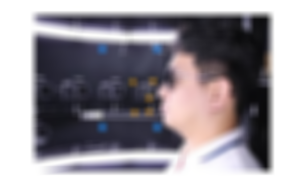

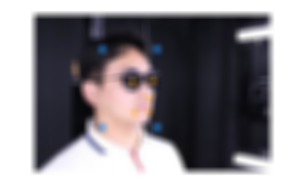

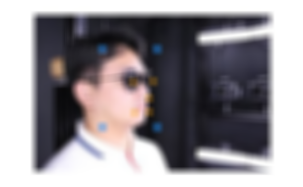

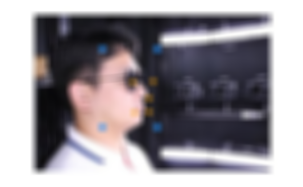

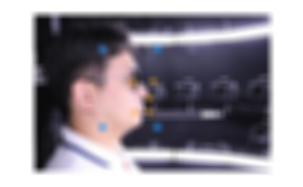

In [78]:
TEST_DIR = "H:\\FaceNet\\detection_test\\"

test_images = os.listdir(TEST_DIR)

for image in test_images[:5]: 
    img = cv2.imread(TEST_DIR + image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.GaussianBlur(img, (11,11), sigmaX=11, sigmaY=11)
    
    # visualise
    fig, ax = plt.subplots(figsize=(5, 3))
    plt.tight_layout()
    ax.imshow(img)
    ax.axis('off')
    